# User Engagement Analysis

##### User’s engagement using the following engagement metrics:
- Sessions frequency
- Duration of the session
- Sessions total traffic (download and upload (bytes))

In [1]:
#import python library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math
import seaborn as sns
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go  
from IPython.display import Image
from sklearn import preprocessing
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.preprocessing import StandardScaler, normalize

In [2]:
import warnings
import os,sys
warnings.filterwarnings("ignore", category=FutureWarning)
#pd.set_option('max_column', None)
sys.path.append(os.path.abspath(os.path.join('../scripts')))
df = pd.read_csv('../data/cleaned_data.csv', na_values=['?',"n.a.","NA","n/a", "na", None])
df.head()
from  data_display import *
from Graphical_view import *
import Graphical_view

In [3]:
df.drop("Unnamed: 0", axis=1, inplace= True)

In [4]:
# column names
df.columns.to_list()

['Bearer Id',
 'Start',
 'Start ms',
 'End',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Social Media DL (Bytes)',
 'Social Media UL (Bytes)',
 'Google DL (Bytes)',
 'Google UL (Bytes)',
 'Email DL (Bytes)',
 'Email UL (Bytes)',
 'Youtube DL (Bytes)',
 'Youtube UL (Bytes)',
 'Netflix DL (Bytes)',
 'Netflix UL (Bytes)',
 'Gaming DL (Bytes)',
 'Gaming UL (Bytes)',
 'Other DL (Bytes)',
 'Other UL (Bytes)',
 'Total UL (Bytes)',
 'Total DL (By

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148506 entries, 0 to 148505
Data columns (total 45 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Bearer Id                       148506 non-null  float64
 1   Start                           148506 non-null  object 
 2   Start ms                        148506 non-null  float64
 3   End                             148506 non-null  object 
 4   End ms                          148506 non-null  float64
 5   Dur. (ms)                       148506 non-null  float64
 6   IMSI                            148506 non-null  float64
 7   MSISDN/Number                   148506 non-null  float64
 8   IMEI                            148506 non-null  float64
 9   Last Location Name              148506 non-null  object 
 10  Avg RTT DL (ms)                 148506 non-null  float64
 11  Avg RTT UL (ms)                 148506 non-null  float64
 12  Avg Bearer TP DL

**1. Session Frequency**

In [6]:
# Group users
user_data = df.groupby("MSISDN/Number")

In [7]:
# count the number os sessions
user_session = user_data["Bearer Id"].count()
user_session.head(20)

MSISDN/Number
33601001722.00    1
33601001754.00    1
33601002511.00    1
33601007832.00    1
33601008617.00    2
33601010682.00    2
33601011634.00    2
33601011959.00    1
33601014694.00    2
33601020306.00    1
33601021045.00    1
33601021217.00    1
33601022743.00    1
33601024291.00    1
33601025738.00    1
33601026147.00    1
33601027208.00    1
33601031129.00    1
33601032846.00    1
33601032987.00    1
Name: Bearer Id, dtype: int64

**1. Session Duration**

In [8]:
user_session = user_data["Dur. (ms)"].sum()
user_session

MSISDN/Number
33601001722.00       116720.00
33601001754.00       181230.00
33601002511.00       134969.00
33601007832.00        49878.00
33601008617.00        37104.00
                        ...   
33789996170.00         8810.00
33789997247.00       140988.00
3197020876596.00     877385.00
337000037000919.00   253030.00
882397108489451.00   869844.00
Name: Dur. (ms), Length: 106471, dtype: float64

In [9]:
#Aggregate total value
df["Total Uploads"]=df["Google UL (Bytes)"]+df["Email UL (Bytes)"]+df["Social Media UL (Bytes)"]+df["Youtube UL (Bytes)"]+df["Netflix UL (Bytes)"]+df["Gaming UL (Bytes)"]+df["Other UL (Bytes)"]
df["Total Downloads"]=df["Google DL (Bytes)"]+df["Email DL (Bytes)"]+df["Social Media DL (Bytes)"]+df["Youtube DL (Bytes)"]+df["Netflix DL (Bytes)"]+df["Gaming DL (Bytes)"]+df["Other DL (Bytes)"]
df['Total UL and DL']=df['Total DL (Bytes)']+df["Total UL (Bytes)"]

In [10]:
# Aggregate Total Social Media data
df["Youtube_Total_Data"]=df["Youtube DL (Bytes)"]+df["Youtube UL (Bytes)"]
df["Google_Total_Data"]=df["Google DL (Bytes)"]+df["Google UL (Bytes)"]
df["Email_Total_Data"]=df["Email DL (Bytes)"]+df["Email UL (Bytes)"]
df["Social_Media_Total_Data"]=df["Social Media DL (Bytes)"]+df["Social Media UL (Bytes)"]
df["Netflix_Total_Data"]=df["Netflix DL (Bytes)"]+df["Netflix UL (Bytes)"]
df["Gaming_Total_Data"]=df["Gaming DL (Bytes)"]+df["Gaming UL (Bytes)"]
df["Other_Total_Data"]=df["Other DL (Bytes)"]+df["Other UL (Bytes)"]

In [11]:
##### Session total trafic(download and upload)
user = df[['MSISDN/Number', 'Bearer Id', 'Dur. (ms).1', 'Total UL and DL']].copy().rename(columns={'Dur. (ms).1': 'time_duration'})
user

,MSISDN/Number,Bearer Id,time_duration,Total UL and DL
0,33664962239.00,13114483460844900352.00,1823652892.00,345629377.00
1,33681854413.00,13114483482878900224.00,1365104371.00,707185356.00
2,33760627129.00,13114483484080500736.00,1361762651.00,307690973.00
3,33750343200.00,13114483485442799616.00,1321509685.00,889352748.00
4,33699795932.00,13114483499480700928.00,1089009389.00,607681403.00
...,...,...,...,...
148501,33668648496.00,13042425979329300480.00,59587792.00,872761860.00
148502,33650688697.00,7277825670196679680.00,81230763.00,631804110.00
148503,33663449963.00,7349883264234609664.00,97970704.00,705783925.00
148504,33621890103.00,13114483573367300096.00,98249527.00,627698629.00


In [12]:
user = user.groupby('MSISDN/Number').agg({'Bearer Id': 'count', 'time_duration': 'sum', 'Total UL and DL': 'sum'})
user = user.rename(columns={'Bearer Id': 'sessions'})
user.head(10)


,sessions,time_duration,Total UL and DL
MSISDN/Number,,,
33601001722.00,1,116720140.00,878690574.00
33601001754.00,1,181230963.00,156859643.00
33601002511.00,1,134969374.00,595966483.00
33601007832.00,1,49878024.00,422320698.00
33601008617.00,2,37104453.00,1457410944.00
33601010682.00,2,253983077.00,615217221.00
33601011634.00,2,128360523.00,654723066.00
33601011959.00,1,86399977.00,332660357.00
33601014694.00,2,495702147.00,990132189.00


 - Aggregate the above metrics per customer id (MSISDN) and report the top 10 customers per engagement metric

**Top 10 User Engagement to time**

In [13]:
user.nlargest(10, "time_duration")

,sessions,time_duration,Total UL and DL
MSISDN/Number,,,
33625779332.00,17,18553763486.00,8499620722.00
33614892860.00,17,9966905758.00,8846226494.00
33760536639.00,15,9279442000.00,8514773963.00
33626320676.00,18,8791936680.00,7971167261.00
33667163239.00,13,8744922020.00,5618394054.00
33662840755.00,9,6614274287.00,4000097981.00
33664693736.00,9,6288735771.00,5682007334.00
33603127838.00,12,6287767483.00,4976195043.00
33667456716.00,6,5649885358.00,2600521941.00


Let's show using histogram

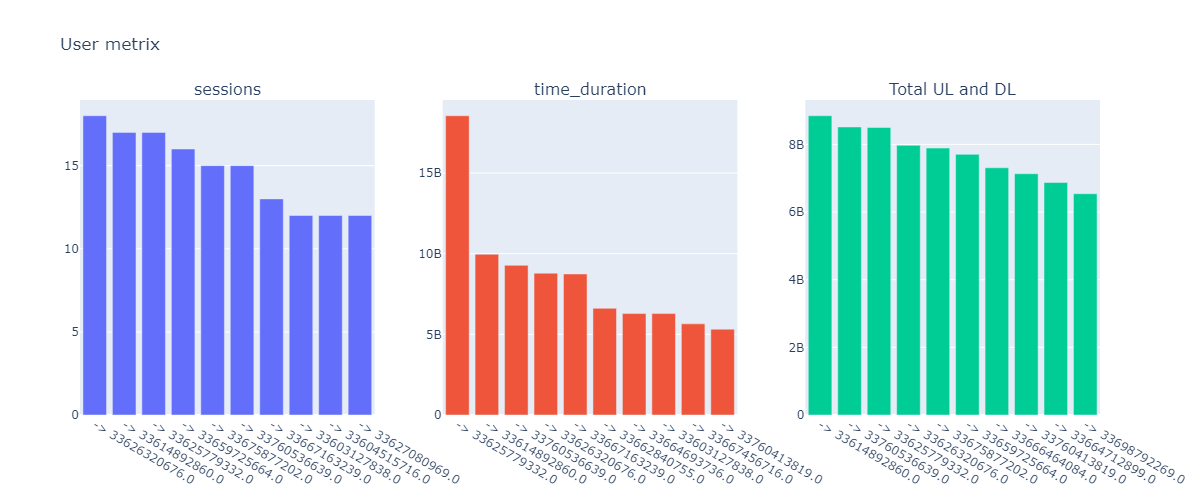

In [14]:
sessions = user.nlargest(10, "sessions")['sessions']
duration = user.nlargest(10, "time_duration")['time_duration']
data_volume = user.nlargest(10, "Total UL and DL")['Total UL and DL']

mult_hist([sessions, duration, data_volume], 1,3, "User metrix", ['sessions', 'time_duration','Total UL and DL'])

- Normalize each engagement metric and run a k-means (k=3) to classify customers in three groups of engagement.

<Axes: >

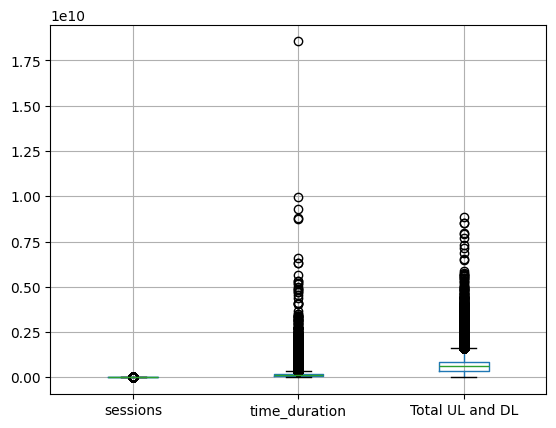

In [15]:
user.boxplot()

##### Standardize feature

**StandardScaler:** is used to standardize features by removing the mean and scaling them to unit variance (z-score normalization).
- for better convergence

**StandardScaler Formula:**

z = (x - u) / s

Where:
* z: Standardized value
* x: Original value
* u: Mean of the feature
* s: Standard deviation of the feature

This transforms features to have zero mean and unit variance.

Apply this computation on each feature

In [16]:
scaler = StandardScaler()
scaled_array = scaler.fit_transform(user)
pd.DataFrame(scaled_array).head(10)


,0,1,2
0,-0.49,-0.16,0.38
1,-0.49,0.19,-1.09
2,-0.49,-0.06,-0.19
3,-0.49,-0.52,-0.55
4,0.75,-0.59,1.56
5,0.75,0.58,-0.16
6,0.75,-0.10,-0.07
7,-0.49,-0.32,-0.73
8,0.75,1.87,0.61
9,-0.49,-0.12,0.08


**Normalization** - ensures that the magnitude of each row is equal to 1, which is especially useful for algorithms that are sensitive to feature magnitudes (e.g., __k-means__, cosine similarity, or nearest neighbor methods).

In [17]:
data_normalized = normalize(scaled_array)
pd.DataFrame(data_normalized).head(10)

,0,1,2
0,-0.76,-0.25,0.59
1,-0.41,0.15,-0.90
2,-0.92,-0.12,-0.37
3,-0.54,-0.58,-0.61
4,0.41,-0.32,0.85
5,0.78,0.60,-0.16
6,0.99,-0.13,-0.10
7,-0.52,-0.34,-0.78
8,0.36,0.89,0.29
9,-0.96,-0.23,0.16


In [18]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(data_normalized)
kmeans

KMeans(n_clusters=3, random_state=0)

In [19]:
kmeans.labels_

array([1, 2, 2, ..., 0, 2, 0])

In [20]:
user.insert(0, 'Cluster', kmeans.labels_)
user.head(10)

,Cluster,sessions,time_duration,Total UL and DL
MSISDN/Number,,,,
33601001722.00,1,1,116720140.00,878690574.00
33601001754.00,2,1,181230963.00,156859643.00
33601002511.00,2,1,134969374.00,595966483.00
33601007832.00,2,1,49878024.00,422320698.00
33601008617.00,0,2,37104453.00,1457410944.00
33601010682.00,0,2,253983077.00,615217221.00
33601011634.00,0,2,128360523.00,654723066.00
33601011959.00,2,1,86399977.00,332660357.00
33601014694.00,0,2,495702147.00,990132189.00


In [22]:
user['Cluster'].value_counts()

Cluster
2    47690
1    29530
0    29251
Name: count, dtype: int64

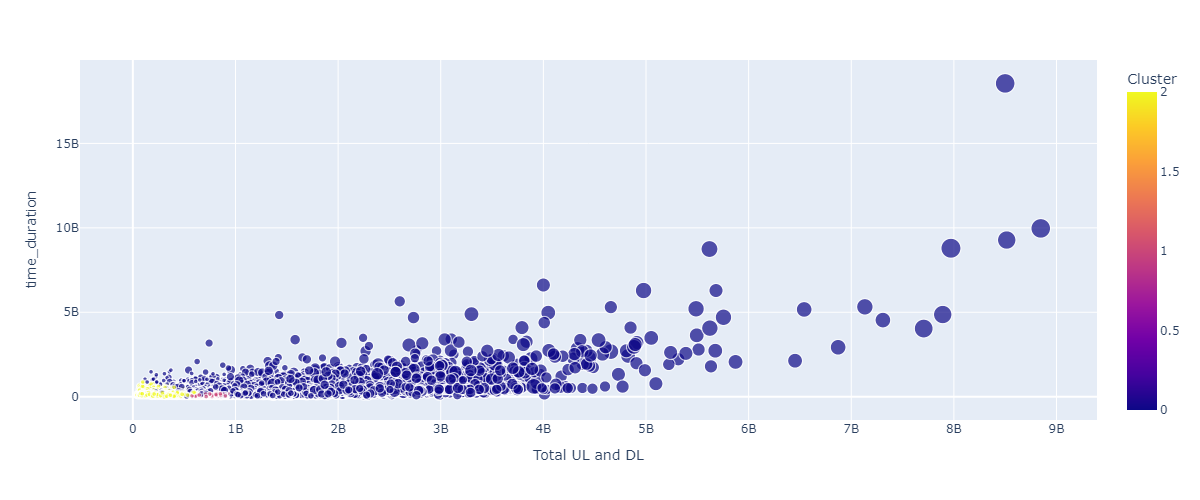

In [23]:
fig = px.scatter(user, x='Total UL and DL', y="time_duration", color='Cluster', size='sessions')
Image(pio.to_image(fig, format='png', width=1200))

- Compute the minimum, maximum, average & total non- normalized metrics for each cluster. Interpret your results visually with accompanying text explaining your findings.

In [24]:
clusters = user[user["Cluster"]==0]
clusters.describe()

,Cluster,sessions,time_duration,Total UL and DL
count,29251.00,29251.00,29251.00,29251.00
mean,0.00,2.43,265474410.38,1210034365.48
std,0.00,0.94,309464138.22,592906318.82
min,0.00,1.00,18235797.00,118487293.00
25%,0.00,2.00,131080044.00,822616281.50
50%,0.00,2.00,202445436.00,1108117136.00
75%,0.00,3.00,326104258.50,1463484583.00
max,0.00,18.00,18553763486.00,8846226494.00


**Interpretation**
1. mean
    - most users engage in about 2 to 3 sessions
    - ~265 seconds or 4.4 minutes on average
    - ~1.2 GB average data usage per user
2. spread(standard deviation)
    - Data usage has a high variability (std = ~592 MB), indicating diverse behavior among users.
- Generally
This cluster represents moderate-to-heavy users:
2. They have higher session durations and significant data usage compared to other clusters.
1. A small portion of users may engage in long-duration activities (max: ~18 minutes).


In [25]:
clusters = user[user["Cluster"]==1]
clusters.describe()

,Cluster,sessions,time_duration,Total UL and DL
count,29530.00,29530.00,29530.00,29530.00
mean,1.00,1.00,93136994.69,754173037.75
std,0.00,0.00,56940986.68,96976463.06
min,1.00,1.00,7142988.00,545365335.00
25%,1.00,1.00,45782277.00,673276753.00
50%,1.00,1.00,86399963.00,755835405.50
75%,1.00,1.00,127696844.50,836796230.00
max,1.00,1.00,340560164.00,950760661.00


**Interpretation**
1. Mean:
    - users only engage in a single session per activity.
    - ~93 seconds or ~1.5 minutes on average.
    - ~754 MB average data usage per user.
2. Spread (Standard Deviation):
    - Data usage is more consistent across users (std = ~96 MB), suggesting homogeneity.
**Generally**
1. This cluster represents light, uniform users
2. Users engage in single, short sessions with relatively low data usage.

In [27]:
clusters = user[user["Cluster"]==2]
clusters.describe()

,Cluster,sessions,time_duration,Total UL and DL
count,47690.00,47690.00,47690.00,47690.00
mean,2.00,1.01,106730263.47,334689982.89
std,0.00,0.07,70234943.96,152583770.43
min,2.00,1.00,7189000.00,33249009.00
25%,2.00,1.00,59957804.75,204189195.50
50%,2.00,1.00,87615196.50,332652374.00
75%,2.00,1.00,142933362.00,464588540.50
max,2.00,2.00,869830549.00,709084207.00


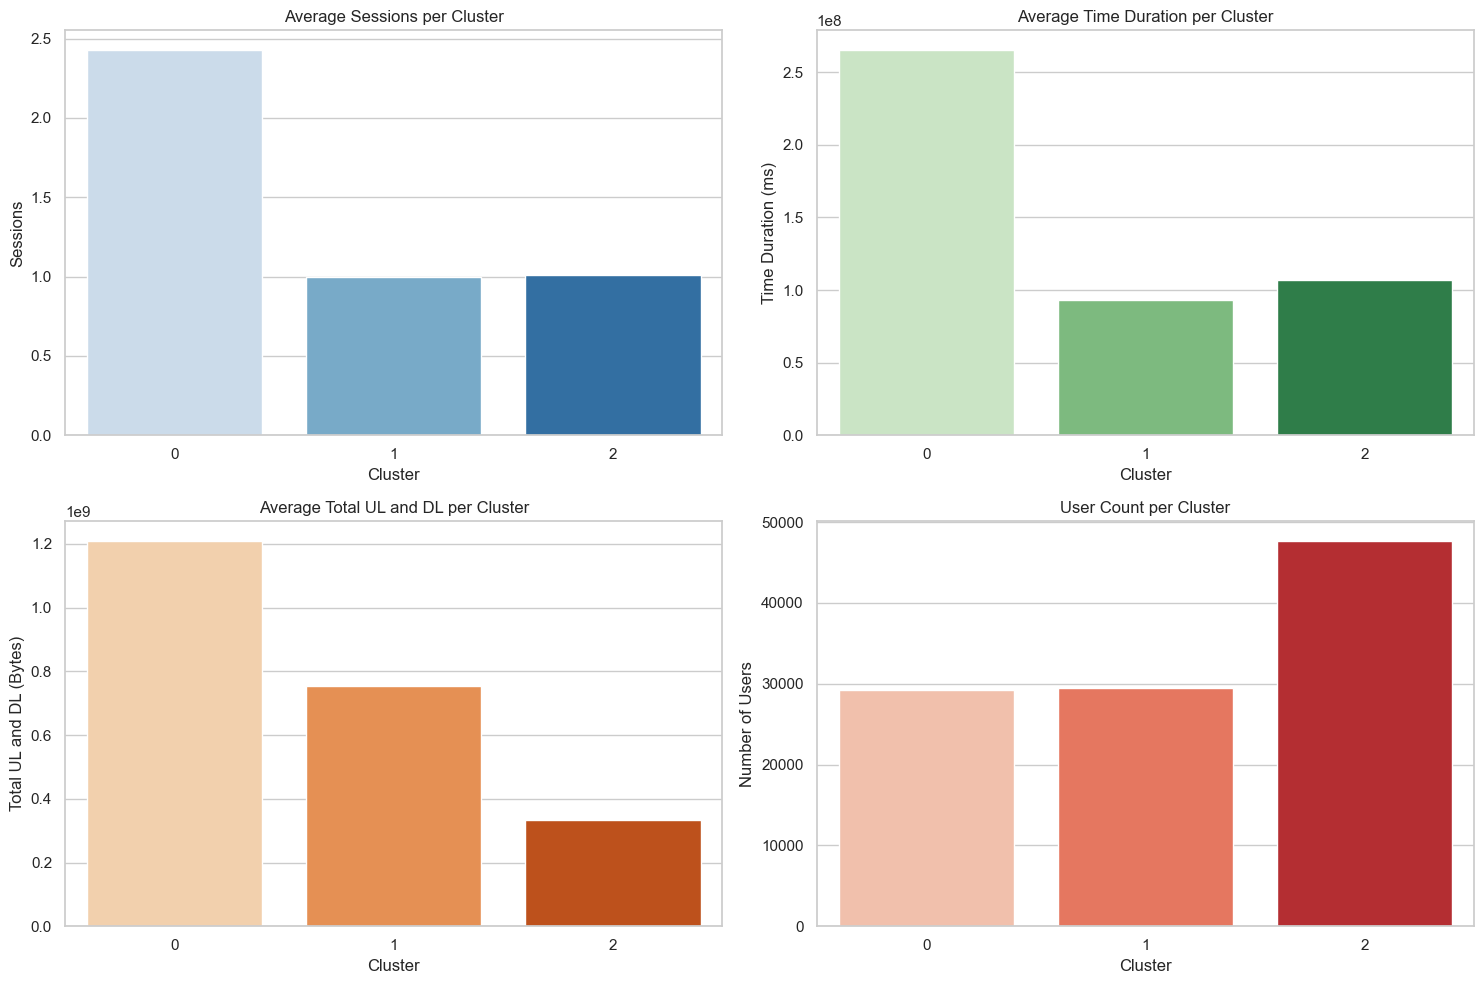

In [28]:
cluster_stats = pd.DataFrame({
    "Cluster": [0, 1, 2],
    "Avg_Sessions": [2.43, 1.00, 1.01],
    "Avg_Time_Duration (ms)": [265474410, 93136994, 106730263],
    "Avg_Total_UL_DL (Bytes)": [1210034365, 754173037, 334689982],
    "User_Count": [29251, 29530, 47690]
})

# Set plot style
sns.set(style="whitegrid")

# Create a subplot with 2 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Bar chart for average sessions
sns.barplot(
    x="Cluster", y="Avg_Sessions", data=cluster_stats, ax=axes[0, 0], palette="Blues"
).set(title="Average Sessions per Cluster", xlabel="Cluster", ylabel="Sessions")

# Bar chart for average time duration
sns.barplot(
    x="Cluster",
    y="Avg_Time_Duration (ms)",
    data=cluster_stats,
    ax=axes[0, 1],
    palette="Greens",
).set(
    title="Average Time Duration per Cluster",
    xlabel="Cluster",
    ylabel="Time Duration (ms)",
)

# Bar chart for average total upload/download data
sns.barplot(
    x="Cluster",
    y="Avg_Total_UL_DL (Bytes)",
    data=cluster_stats,
    ax=axes[1, 0],
    palette="Oranges",
).set(
    title="Average Total UL and DL per Cluster",
    xlabel="Cluster",
    ylabel="Total UL and DL (Bytes)",
)

# Bar chart for user count per cluster
sns.barplot(
    x="Cluster", y="User_Count", data=cluster_stats, ax=axes[1, 1], palette="Reds"
).set(title="User Count per Cluster", xlabel="Cluster", ylabel="Number of Users")

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

- Aggregate user total traffic per application and derive the top 10 most engaged users per application

In [30]:
apps_df = df.groupby('MSISDN/Number').agg({'Gaming_Total_Data': 'sum', 'Youtube_Total_Data': 'sum', 'Netflix_Total_Data': 'sum',\
                     'Google_Total_Data': 'sum', 'Email_Total_Data': 'sum', 'Social_Media_Total_Data': 'sum', 'Other_Total_Data': 'sum'})
apps_df.head(10)

,Gaming_Total_Data,Youtube_Total_Data,Netflix_Total_Data,Google_Total_Data,Email_Total_Data,Social_Media_Total_Data,Other_Total_Data
MSISDN/Number,,,,,,,
33601001722.00,812458661.00,21624548.00,27180981.00,4389005.00,1331362.00,2232135.00,386570872.00
33601001754.00,119750078.00,12432223.00,11221763.00,5334863.00,3307781.00,2660565.00,281710071.00
33601002511.00,538827713.00,21333570.00,19353900.00,3443126.00,3205380.00,3195623.00,501693672.00
33601007832.00,391126127.00,6977321.00,1942092.00,9678493.00,2284670.00,280294.00,35279702.00
33601008617.00,1314797820.00,41533002.00,49201724.00,18499616.00,3305469.00,2912542.00,804804484.00
33601010682.00,511635787.00,34347122.00,30315501.00,15263134.00,7848596.00,3792912.00,492372777.00
33601011634.00,548461057.00,26431335.00,45812397.00,10196403.00,1358959.00,2769627.00,224888713.00
33601011959.00,282364397.00,18892740.00,15292840.00,12023614.00,2215563.00,1782692.00,178201537.00
33601014694.00,833087952.00,63443802.00,54216117.00,14134211.00,4599825.00,5288685.00,1041882992.00


In [34]:
Gaming_Data = apps_df.nlargest(10, "Gaming_Total_Data")['Gaming_Total_Data']
Youtube_Data = apps_df.nlargest(10, "Youtube_Total_Data")['Youtube_Total_Data']
Netflix_Data = apps_df.nlargest(10, "Netflix_Total_Data")['Netflix_Total_Data']
Google_Data = apps_df.nlargest(10, "Google_Total_Data")['Google_Total_Data']
Email_Data = apps_df.nlargest(10, "Email_Total_Data")['Email_Total_Data']
Social_Media = apps_df.nlargest(10, "Social_Media_Total_Data")['Social_Media_Total_Data']
Other_Data = apps_df.nlargest(10, "Other_Total_Data")['Other_Total_Data']




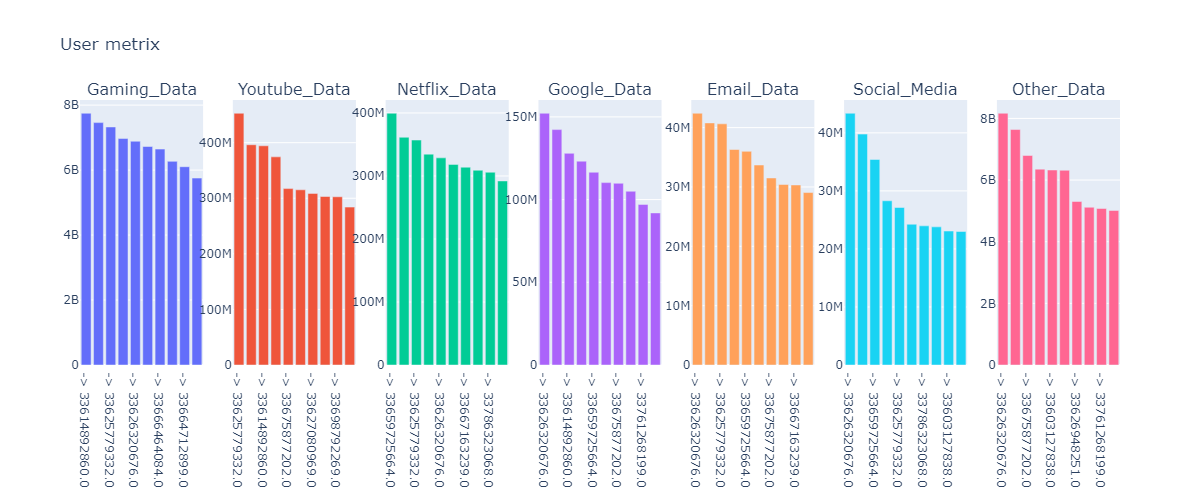

In [36]:
mult_hist([Gaming_Data, Youtube_Data, Netflix_Data,Google_Data, Email_Data,Social_Media,Other_Data], 1,
          7, "User metrix", ["Gaming_Data", "Youtube_Data", "Netflix_Data","Google_Data","Email_Data","Social_Media","Other_Data"])

* Plot the top 3 most used applications using appropriate charts.

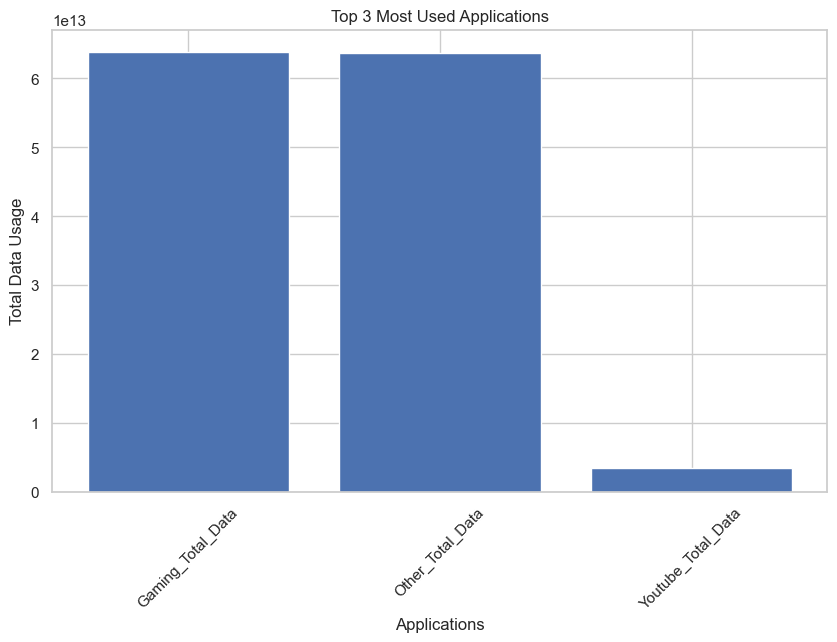

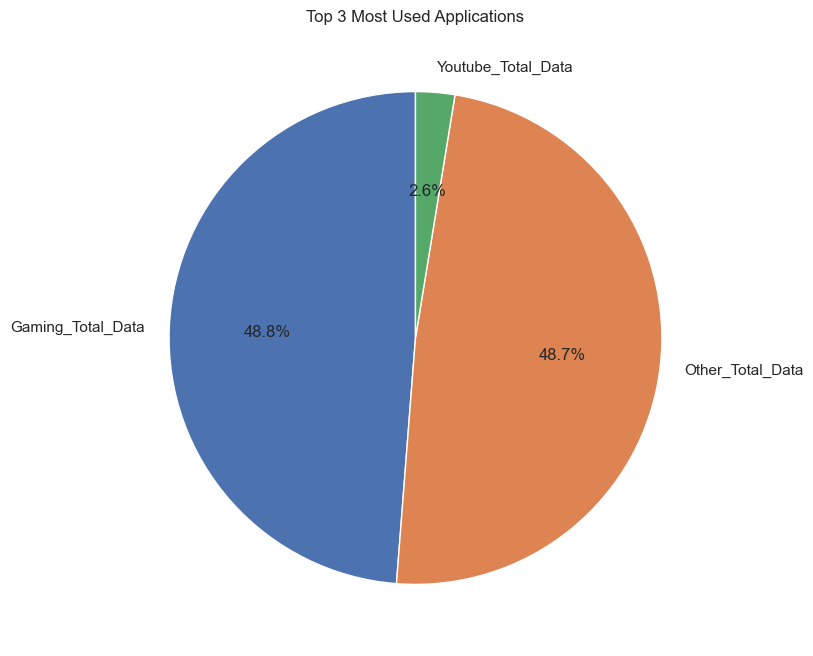

In [48]:
# Calculate total usage for each application
app_usage = apps_df.sum()

# Create a DataFrame with 'Application' and 'Usage' columns
usage_df = pd.DataFrame({'Usage': app_usage})
usage_df.index.name = 'Application' 

# Get the top 3 applications
top_3_apps = usage_df.nlargest(3, 'Usage')

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_3_apps.index, top_3_apps['Usage'])
plt.xlabel("Applications")
plt.ylabel("Total Data Usage")
plt.title("Top 3 Most Used Applications")
plt.xticks(rotation=45) 
plt.show()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_3_apps['Usage'], labels=top_3_apps.index, autopct='%1.1f%%', startangle=90)
plt.title("Top 3 Most Used Applications")
plt.show()

,Application,Usage
0,Gaming_Total_Data,63910124731666.00
1,Youtube_Total_Data,3362537620065.00
2,Netflix_Total_Data,3360563670772.00
3,Google_Total_Data,1159544186717.00
4,Email_Total_Data,335503000148.00
5,Social_Media_Total_Data,271478798103.00
6,Other_Total_Data,63770726326023.00


* Using k-means clustering algorithm, group users in k engagement clusters based on the engagement metrics.

    - Distortion- is the average of the euclidean squared distance from the centroid of the respective clusters.

    - Inertia- is the sum of squared distances of samples to their closest cluster centre.

In [49]:
def choose_kmeans(df: pd.DataFrame, num: int):
  distortions = []
  inertias = []
  K = range(1, num)
  for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(df)
    distortions.append(sum(
        np.min(cdist(df, kmeans.cluster_centers_, 'euclidean'), axis=1)) / df.shape[0])
    inertias.append(kmeans.inertia_)

  return (distortions, inertias)

In [69]:
distortions, inertias = choose_kmeans(data_normalized, 20)

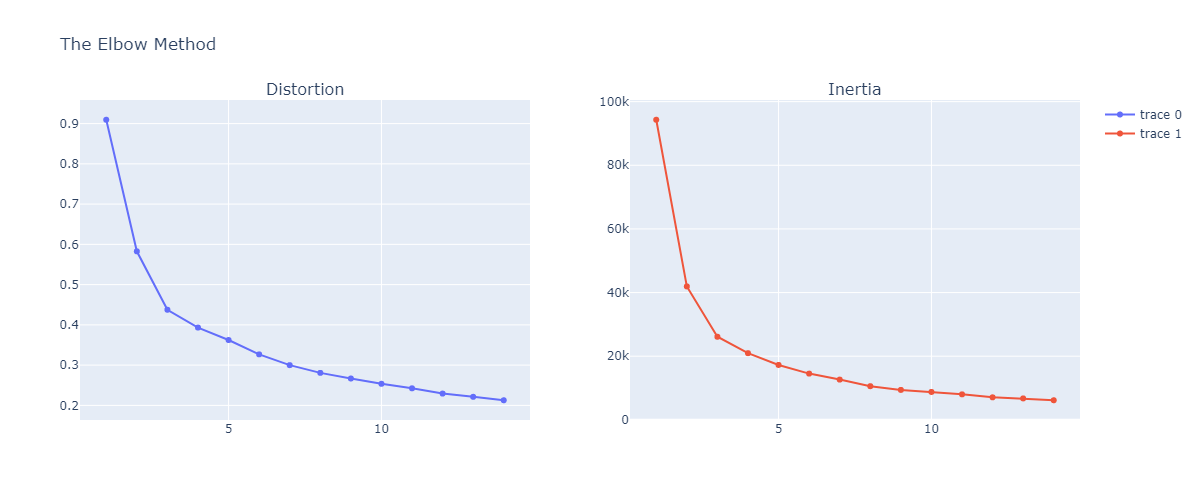

In [70]:
fig = make_subplots(
    rows=1, cols=2, subplot_titles=("Distortion", "Inertia")
)
fig.add_trace(go.Scatter(x=np.array(range(1, 15)), y=distortions), row=1, col=1)
fig.add_trace(go.Scatter(x=np.array(range(1, 15)), y=inertias), row=1, col=2)
fig.update_layout(title_text="The Elbow Method")
# fig.show(config=config)
Image(pio.to_image(fig, format='png', width=1200))

* The graph suggests that 4 cluster value is optimal number of cluster

In [71]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(data_normalized)
user["cluster"]= kmeans.labels_
user

,Cluster,sessions,time_duration,Total UL and DL,cluster
MSISDN/Number,,,,,
33601001722.00,1,1,116720140.00,878690574.00,3
33601001754.00,2,1,181230963.00,156859643.00,1
33601002511.00,2,1,134969374.00,595966483.00,1
33601007832.00,2,1,49878024.00,422320698.00,1
33601008617.00,0,2,37104453.00,1457410944.00,0
...,...,...,...,...,...
33789996170.00,1,1,8810688.00,714641641.00,3
33789997247.00,2,1,140988659.00,480307335.00,1
3197020876596.00,0,1,877385325.00,232123971.00,2


Save the data set

In [73]:
user.to_csv('../data/user_engagement.csv')

In [76]:
import pickle

In [77]:
with open("../models/users.pkl", "wb") as f:
    pickle.dump(kmeans, f)

==============================End==============================